### **Data Preprocessing for Machine Learning**

#### **Dataset**

In [1]:
import os
import tarfile
import urllib.request
import pandas as pd

DOWNLOAD_ROOT = "https://github.com/ageron/data/raw/main/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    with tarfile.open(tgz_path) as housing_tgz:
        housing_tgz.extractall(path=housing_path)

fetch_housing_data()
df = pd.read_csv(os.path.join(HOUSING_PATH, "G:\AI\AI\Homework AI\lesson-2\homework\datasets\housing\housing\housing.csv"))

In [2]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## **Part 1: Exploratory Data Analysis (EDA)**

1. Display:

* The first 10 rows.

In [3]:
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


* Dataset info using `.info()`.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


* Summary statistics using `.describe()`.

In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


* Value counts for categorical columns (e.g., `ocean_proximity`).

In [6]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

2. Identify:

* Columns with missing values.

In [7]:
df.isna().sum()/len(df)*100

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

The missing value percentage for total_bedrooms column is around 1%

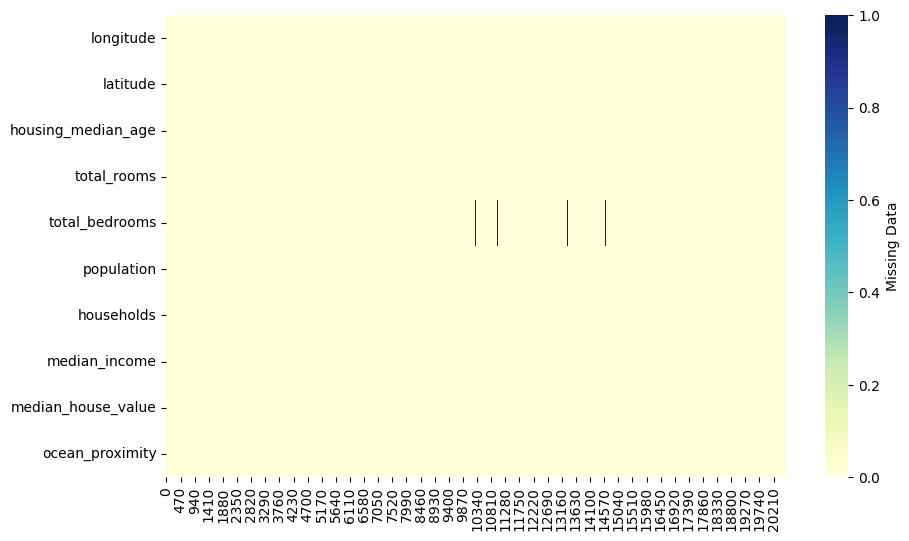

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(), cmap='YlGnBu', cbar_kws={'label': 'Missing Data'})
plt.show()

* Numerical vs categorical features.

In [9]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

* Columns with unusual distributions or outliers.

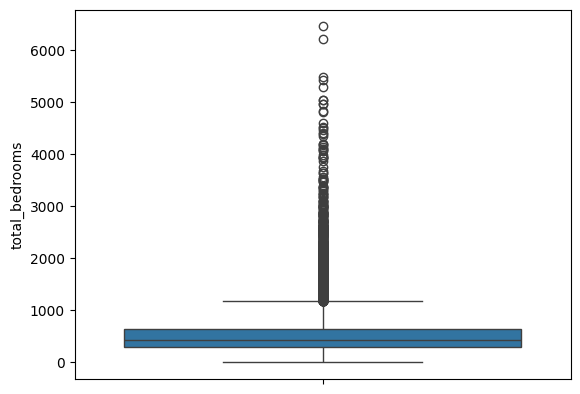

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
# check outlier in total_bedrooms column
sns.boxplot(df['total_bedrooms'])
plt.show()

## **Part 2: Handling Missing Values**

3. For missing data:

* Drop any row or column if missing values are insignificant.

In [11]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

* Use **median** imputation for `total_bedrooms`.

In [12]:
med_val=df['total_bedrooms'].median()
df['total_bedrooms']=df['total_bedrooms'].fillna(med_val)

4. Create a `missing_report(df)` function that:

  * Returns a DataFrame: column name, count and percentage of missing values.

In [13]:
missing_data = df.isnull().sum()
missing_data

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [14]:
def missing_report(df):
    missing_data = df.isnull().sum()
    missing_data = missing_data[missing_data > 0] # Filter columns with actual missing values
    missing_percentage = (missing_data / len(df)) * 100
    missing_df = pd.DataFrame({
        'Column Name': missing_data.index,
        'Missing Count': missing_data.values,
        'Missing Percentage': missing_percentage.values
    })
    return missing_df

In [15]:
missing_report(df)

,Column Name,Missing Count,Missing Percentage


## **Part 3: Encoding Categorical Variables**

5. Encode the `ocean_proximity` column:

* Use **One-Hot Encoding** via `pd.get_dummies()` or `OneHotEncoder`.

In [16]:
# perform one-hot encoding using Pandas
one_hot_encoded = pd.get_dummies(df, columns=['ocean_proximity']).astype(int)
one_hot_encoded.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122,37,41,880,129,322,126,8,452600,0,0,0,1,0
1,-122,37,21,7099,1106,2401,1138,8,358500,0,0,0,1,0
2,-122,37,52,1467,190,496,177,7,352100,0,0,0,1,0
3,-122,37,52,1274,235,558,219,5,341300,0,0,0,1,0
4,-122,37,52,1627,280,565,259,3,342200,0,0,0,1,0
5,-122,37,52,919,213,413,193,4,269700,0,0,0,1,0
6,-122,37,52,2535,489,1094,514,3,299200,0,0,0,1,0
7,-122,37,52,3104,687,1157,647,3,241400,0,0,0,1,0
8,-122,37,42,2555,665,1206,595,2,226700,0,0,0,1,0
9,-122,37,52,3549,707,1551,714,3,261100,0,0,0,1,0


## **Part 4: Feature Scaling**
6. For numerical features:

* Apply both **StandardScaler** and **MinMaxScaler** to features like:

Minmax normalization: NumPy

In [17]:
import numpy as np
# Calculate min and max for each column
min_val = np.min(df['median_income'], axis=0)
max_val = np.max(df['median_income'], axis=0)
scaled_data = (df['median_income'] - min_val) / (max_val - min_val)

In [18]:
scaled_data

0        0.539668
1        0.538027
2        0.466028
3        0.354699
4        0.230776
           ...   
20635    0.073130
20636    0.141853
20637    0.082764
20638    0.094295
20639    0.130253
Name: median_income, Length: 20640, dtype: float64

Minmax normalization: Scikit-Learn

In [19]:
from sklearn.preprocessing import MinMaxScaler
# Create a MinMaxScaler instance
scaler = MinMaxScaler()
# Fit and transform the data
scaled_data_sklearn = scaler.fit_transform(df[['median_income']])


In [20]:
scaled_data_sklearn

array([[0.53966842],
       [0.53802706],
       [0.46602805],
       ...,
       [0.08276438],
       [0.09429525],
       [0.13025338]])

* Plot feature histograms before and after scaling.

In [21]:
plt.figure(figsize=(12, 5)) # Create a figure with a suitable size

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

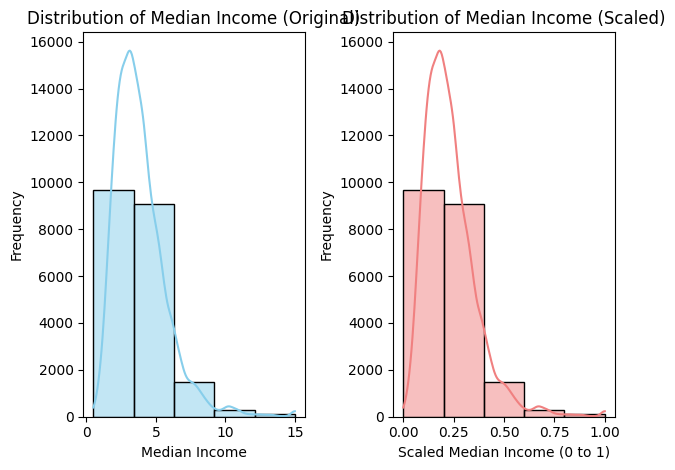

In [22]:
df['median_income_scaled'] = scaler.fit_transform(df[['median_income']])
#Before scaling
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
sns.histplot(df['median_income'], kde=True, bins=5, color='skyblue')
plt.title('Distribution of Median Income (Original)')
plt.xlabel('Median Income')
plt.ylabel('Frequency')
#After scaling
plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
sns.histplot(df['median_income_scaled'], kde=True, bins=5, color='lightcoral')
plt.title('Distribution of Median Income (Scaled)')
plt.xlabel('Scaled Median Income (0 to 1)')
plt.ylabel('Frequency')
plt.tight_layout() # Adjust layout to prevent overlap
plt.show()

## **Part 5: Optional Feature Engineering**

7. Create meaningful new features:


* `rooms_per_household = total_rooms / households`

In [23]:
df['rooms_per_household']=df['total_rooms']/df['households']

* `bedrooms_per_room = total_bedrooms / total_rooms`

In [24]:
df['bedrooms_per_household']=df['total_bedrooms']/df['total_rooms']

* `population_per_household = population / households`

In [25]:
df['population_per_household']=df['population']/df['households']

In [43]:
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_income_scaled,rooms_per_household,bedrooms_per_household,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0.539668,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0.538027,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0.466028,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0.354699,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0.230776,6.281853,0.172096,2.181467
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,0.243921,4.761658,0.231774,2.139896
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,0.217873,4.931907,0.192899,2.128405
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY,0.180694,4.797527,0.221327,1.788253
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,0.108998,4.294118,0.260274,2.026891
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY,0.220087,4.970588,0.199211,2.172269
